In [179]:
#Import statments for packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, levene, ttest_ind, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

In [117]:
#Import statement for data
df = pd.read_csv('marketing_AB.csv')

<h2>Data Familiarization</h2>

In [120]:
#Checks to make sure the file was read correctly
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [122]:
#Count of rows in datafile
print('There are',len(df),'total rows in this dataset')

There are 588101 total rows in this dataset


In [124]:
#Prints the columns
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [126]:
#Shows us now many unique values are within each column
df_category = df[['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour']]
df_category.nunique()

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

<h2>Cleaning Data</h2>

In [129]:
#Checks for duplicate data using the user_id column
df.duplicated(subset = 'user id').sum()

0

In [131]:
#Since we now know there is no duplicate data, lets drop the Unnamed: 0 column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [133]:
#Checks to make sure it worked
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

>There is no more cleaning that is needed. Lets move onto Univariate Analysis.

<h2>Univariate Analysis</h2>

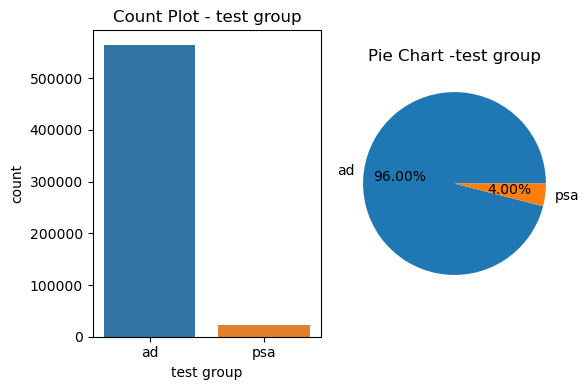

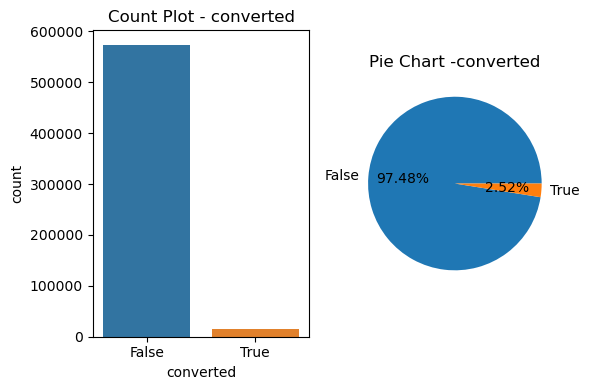

In [136]:
variables = ['test group', 'converted']

for variable in variables:

    plt.figure(figsize = (6,4))
    
    #Count Plot
    plt.subplot(1,2,1)
    sns.countplot(x=variable, data=df_category)
    plt.title(f'Count Plot - {variable}')
    
    #Pie Chart
    plt.subplot(1,2,2)
    counts = df_category[variable].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
    plt.title(f'Pie Chart -{variable}')
    
    #Better layout and show statement
    plt.tight_layout()
    plt.show()

>For these two variables, we can see a very clear skew toward one of the two values. 

>In the case of the test group, we see that 96% are part of the test group, while 4% are part of the control group.

>In the case of the converted column, we see that 2.52% converted, whereas 97.48% did not.

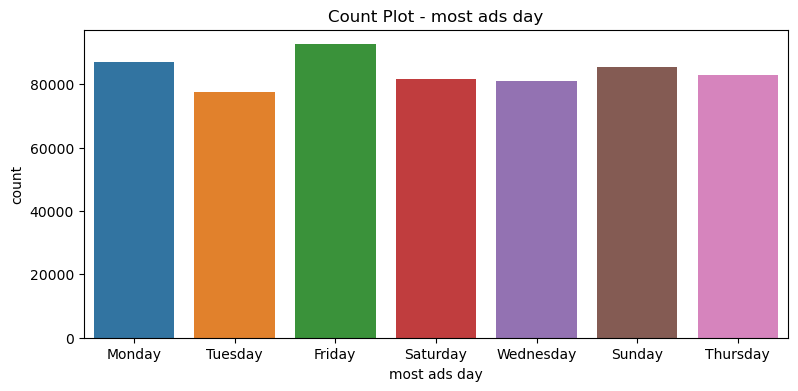

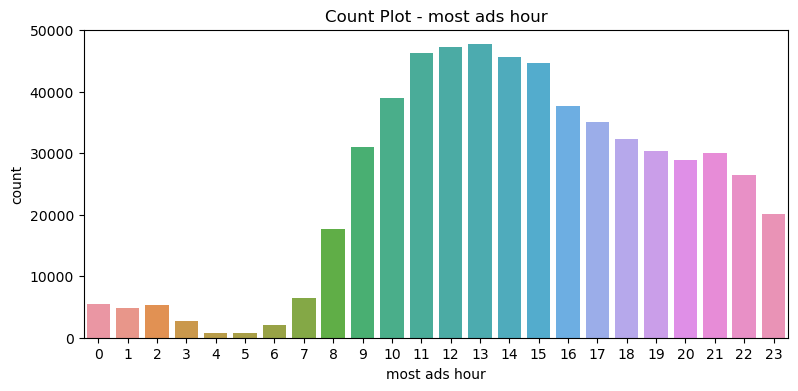

In [139]:
variables = ['most ads day', 'most ads hour']

for variable in variables:

    plt.figure(figsize = (20,4))
    
    #Count Plot
    plt.subplot(1,2,1)
    sns.countplot(x=variable, data=df_category)
    plt.title(f'Count Plot - {variable}')
    
    #Show statement
    plt.show()

Here with these two variables, we see that the day of the week the campaigns ran is mostly even, whereas the most added per hour follows an understandable pattern where it is significantly less during the night hours and peaks at noon, then slowly decreases until midnight.

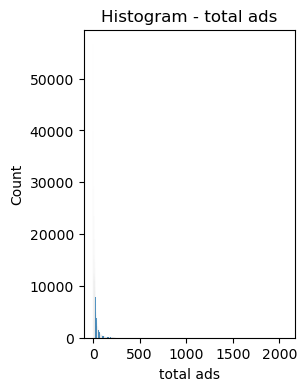

In [142]:
#plots the total adds variable

variable = 'total ads'

plt. figure(figsize = (6, 4))
# Histogram
plt. subplot (1, 2, 1)
sns.histplot(x=variable, data=df)
plt. title(f'Histogram - {variable}')
    
#Show statement
plt.show()

>Since we can see that most of the total additions score less than about 60, let's just take that subset to make the graph more readable.

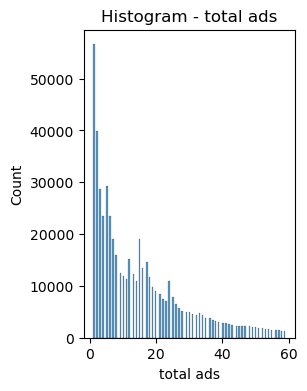

In [144]:
variable = 'total ads'

plt. figure(figsize = (6, 4))
# Histogram
plt. subplot (1, 2, 1)
sns.histplot(x=variable, data=df[df['total ads'] < 60])
plt. title(f'Histogram - {variable}')
    
#Show statement
plt.show()

> Now we can see that the total number of ads a person typically sees is less than 60 but is heavily skewed towards 7 or less. 

<h2>Bivariate Analysis</h2>

<h4>Test Group</h4>

In [150]:
#Creates a crosstab to see what precentages of each group converted
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

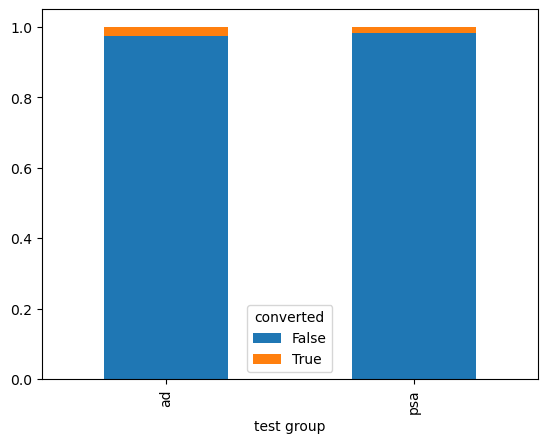

In [152]:
#Shows us the same information but in a visual format
ct_conversion_test_group.plot.bar(stacked = True)

<h4>Conversion By Day</h4>

In [155]:
#Shows us the percentage of conversion by each day
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

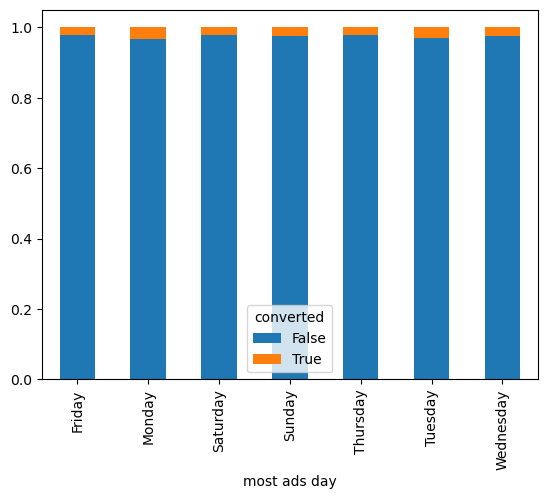

In [157]:
#Plots that percentage in a visual format
ct_conversion_day.plot.bar(stacked = True)

<h4>Conversion By Hour</h4>

In [160]:
#Shows us the percentage of conversion by each hour
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

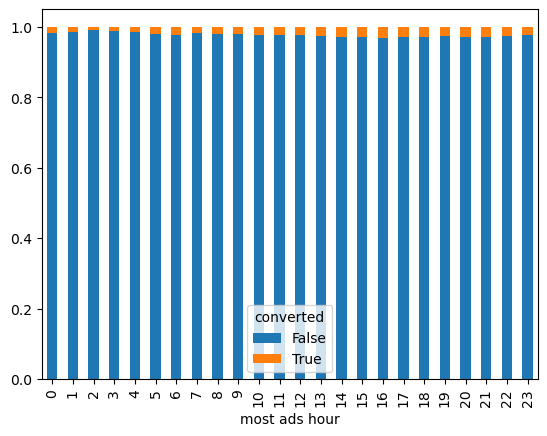

In [162]:
#Plots that percentage in a visual format
ct_conversion_hour.plot.bar(stacked = True)

<Axes: xlabel='converted', ylabel='total ads'>

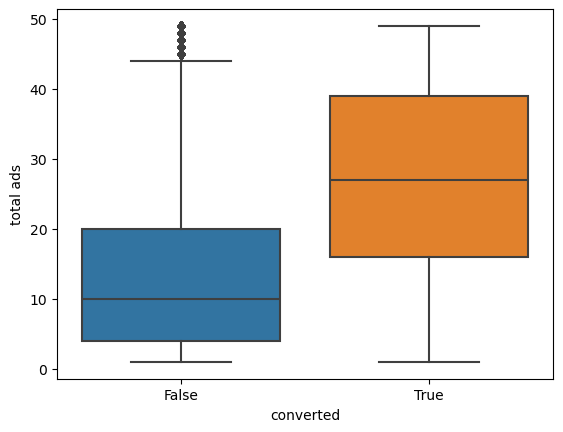

In [165]:
#Shows us if there is a corilation between seeing ore ads and converting
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50])

> The boxplot shows us that those who see more ads are more likely to convert.

<h2>Statstical Tests</h2>

In [171]:
alpha = 0.05
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
for variable in df_cat.columns:
    if variable != 'converted':
        #Creates a contingency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        #Performs the chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        #Prints results
        print(f'\nChi-squared test for {variable} vs. converted:')
        print(f'Chi-squared value: {chi2}')
        print(f'p-value: {p}')

        #Checks if P value is statistically significant or not
        if p < alpha:
            print(f'The difference in conversion rates across {variable} is statistically significant')
        else:
            print(f'There is no statistical significance in conversion rates across {variable}')


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant


In [185]:
#Check Assumptions

#Step 1 Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f'Shapiro-Wilk test for normality (True group): p-value = {shapiro_stat_true}')
print(f'Shapiro-Wilk test for normality (False group): p-value = {shapiro_stat_false}')

#Step 2 Equality for variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f'Levenes test for equality of variances: p-value = {levene_p_value}')

Shapiro-Wilk test for normality (True group): p-value = 0.6578420996665955
Shapiro-Wilk test for normality (False group): p-value = 0.47461962699890137
Levenes test for equality of variances: p-value = 0.0


In [187]:
#Performs a Suitable Test

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    #if our assumptions are met, we use t-test for means
    t_stat , t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Independent two-sample t-test: p-value = {t_p_value}')
else:
    #Assumptions not met - use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f'Mann-Whitney U test: p-value = {u_p_value}')

Mann-Whitney U test: p-value = 0.0
